# Lotka-Volterra 

In [31]:
from IPython.display import HTML      # For animation.
from matplotlib import animation      # For animation.
from matplotlib import pyplot as plt  # For plotting.
import numpy as np                    # For solving ODE.
from scipy.integrate import odeint    # For solving ODE.

## Model 

In [96]:
# Parameters.
# a = 0.5
# b = 0.01
# c = 0.1
# d = 0.01

a12 = 0.2
a21 = 0.5
r1 = 0.2
r2 = 0.5
K1 = 100
K2 = 200
t1 = 0.5
t2 = 0.3

t0 = 0.0       # Initial time.
t1 = 100.0     # Final time.
y0 = [67, 167]  # Initial population of species 0 and 1.

x = pow(100,0.5) - pow(x,0.5) - (0.2*y/pow(100,0.5))
y = pow(200,0.3) - pow(y,0.3) - (0.5*x/pow(200,0.7))

0 = k1 - N1 - a12N2 - b1(N1)^2
0 = k2 - N2 - a21N1 - b2(N2)^2


plt.plot(x, y)
# Model.
# F = lambda y, t: [
#     y[0] * (a - b * y[1]),   # How population 0 changes.
#     y[1] * (-c + d * y[0]),  # How population 1 changes.
# ]

# F = lambda y, t: [
#    (r1* y[0]/pow(K1,t1)) * (pow(K1,t1) - pow(y[0],t1) - (a12 * y[1]/pow(K1,1-t1))),   # How population 0 changes.
#     (r2* y[1]/pow(K2,t2)) * (pow(K2,t2) - pow(y[1],t2) - (a21 * y[0]/pow(K2,1-t2))),  # How population 1 changes.
# ]

# F = lambda y, t: [
#    (r1* y[0]/K1) * (K1 - y[0] - a12 * y[1]),   # How population 0 changes.
#     (r2* y[1]/K2) * (K2 - y[1] - a21 * y[0]),  # How population 1 changes.
# ]

NameError: name 'x' is not defined

In [ ]:
t = np.linspace(t0, t1, 1000)

In [ ]:
plt.plot(t, y1, label='N1')
plt.plot(t, y2, label='N2')
plt.xlabel('time')
plt.ylabel('population')
plt.grid(linestyle=':')
plt.legend()
plt.show()

## Solution 

In [93]:
# Solve ODE.
t = np.linspace(t0, t1, 1000)
y = odeint(F, y0, t)

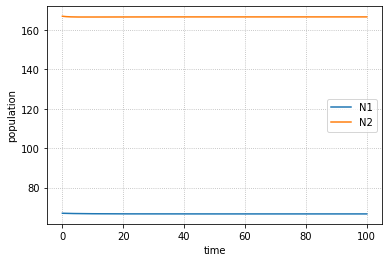

In [94]:
plt.plot(t, y[:, 0], label='N1')
plt.plot(t, y[:, 1], label='N2')
plt.xlabel('time')
plt.ylabel('population')
plt.grid(linestyle=':')
plt.legend()
plt.show()

## Animation

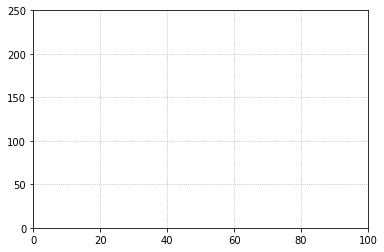

In [35]:
# Same plot, but as an animation.
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
FRAMES = 200

fig, ax = plt.subplots()
ax.grid(linestyle=':')
ax.set_xlim((t0, t1))  # Range of x-axis.
ax.set_ylim((0, 250))  # Range of y-axis.

line0 = ax.plot([], [], lw=2)[0]
line1 = ax.plot([], [], lw=2)[0]

def init():
    line0.set_data([], [])
    line1.set_data([], [])
    return [line0, line1]

def animate(i):
    # Take only first (i/FRAMES) of the total number of points.
    k = len(t) * i // FRAMES
    line0.set_data(t[:k], y[:k, 0])
    line1.set_data(t[:k], y[:k, 1])
    return [line0, line1]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=50, blit=True)

In [36]:
# Create a video.
HTML(anim.to_html5_video())